# **Data Preparation**

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['ggplot'])
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn import tree

Loading the dataset

In [2]:
df=pd.read_csv(r"/content/Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# The information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Describtion about dataset
#df.describe(include='all')
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# Types
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [6]:
# null values
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [7]:
# the shape of dataframe
df.shape

(7043, 21)

**Data Wrangling**

The column of customerID is not important so i will drop it

In [8]:
df.drop('customerID',axis=1,inplace=True)
df.head(2)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [9]:
df['TotalCharges'].describe()

,TotalCharges
count,7043
unique,6531
top,
freq,11


 Number of null values in totalcharges column


In [10]:
len(df[df['TotalCharges']==" "])

11

Converting the type of totalcharges column


In [11]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [12]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].median())
len(df[df['TotalCharges']==" "])

0

In [13]:
df['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [14]:
df['Churn']=df['Churn'].apply(lambda x:1 if x=='Yes' else 0)
df['Churn'].value_counts()# imbalance

,count
Churn,
0,5174
1,1869


In [15]:
df['SeniorCitizen']=df['SeniorCitizen'].astype('object')

In [16]:
categorical=list(df.select_dtypes(include=['object']).columns)
numerical=list(df.select_dtypes(include=['number']).columns)

In [17]:
categorical

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [18]:
numerical

['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

Removing Churn column from numerical


In [19]:
numerical.remove('Churn')

### calculating features importance

In [20]:
# calculate the feature impotance
global_mean=df['Churn'].mean()
round(global_mean,2)

np.float64(0.27)

#### Gender

In [21]:
churn_gender=df.groupby('gender').Churn.mean()
gender_risk= churn_gender/global_mean
gender_risk
# The differance between rates is small so gender is not important feature

,Churn
gender,
Female,1.014466
Male,0.985807


#### Partner

In [22]:
churn_partner=df.groupby('Partner').Churn.mean()
partner_risk= churn_partner/global_mean
partner_risk
# The differance between rates is not small so Partner is important feature

,Churn
Partner,
No,1.241964
Yes,0.741038


### Encoding all Categorical columns using Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [24]:
scaler = StandardScaler()
df[numerical] = scaler.fit_transform(df[numerical])

df[numerical].head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994242
1,0.066327,-0.259629,-0.173244
2,-1.236724,-0.362660,-0.959674
3,0.514251,-0.746535,-0.194766
4,-1.236724,0.197365,-0.940470


# **EDA**

<Axes: >

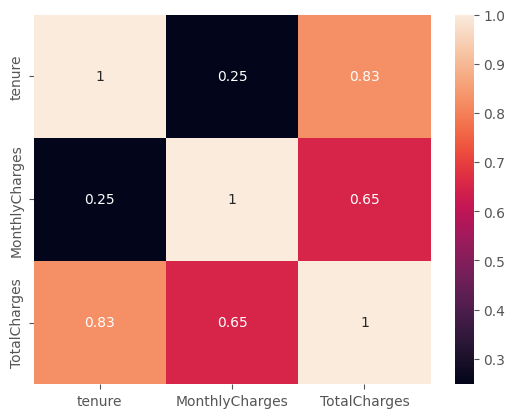

In [25]:
corr_num=df[numerical].corr()
sns.heatmap(corr_num,annot=True)

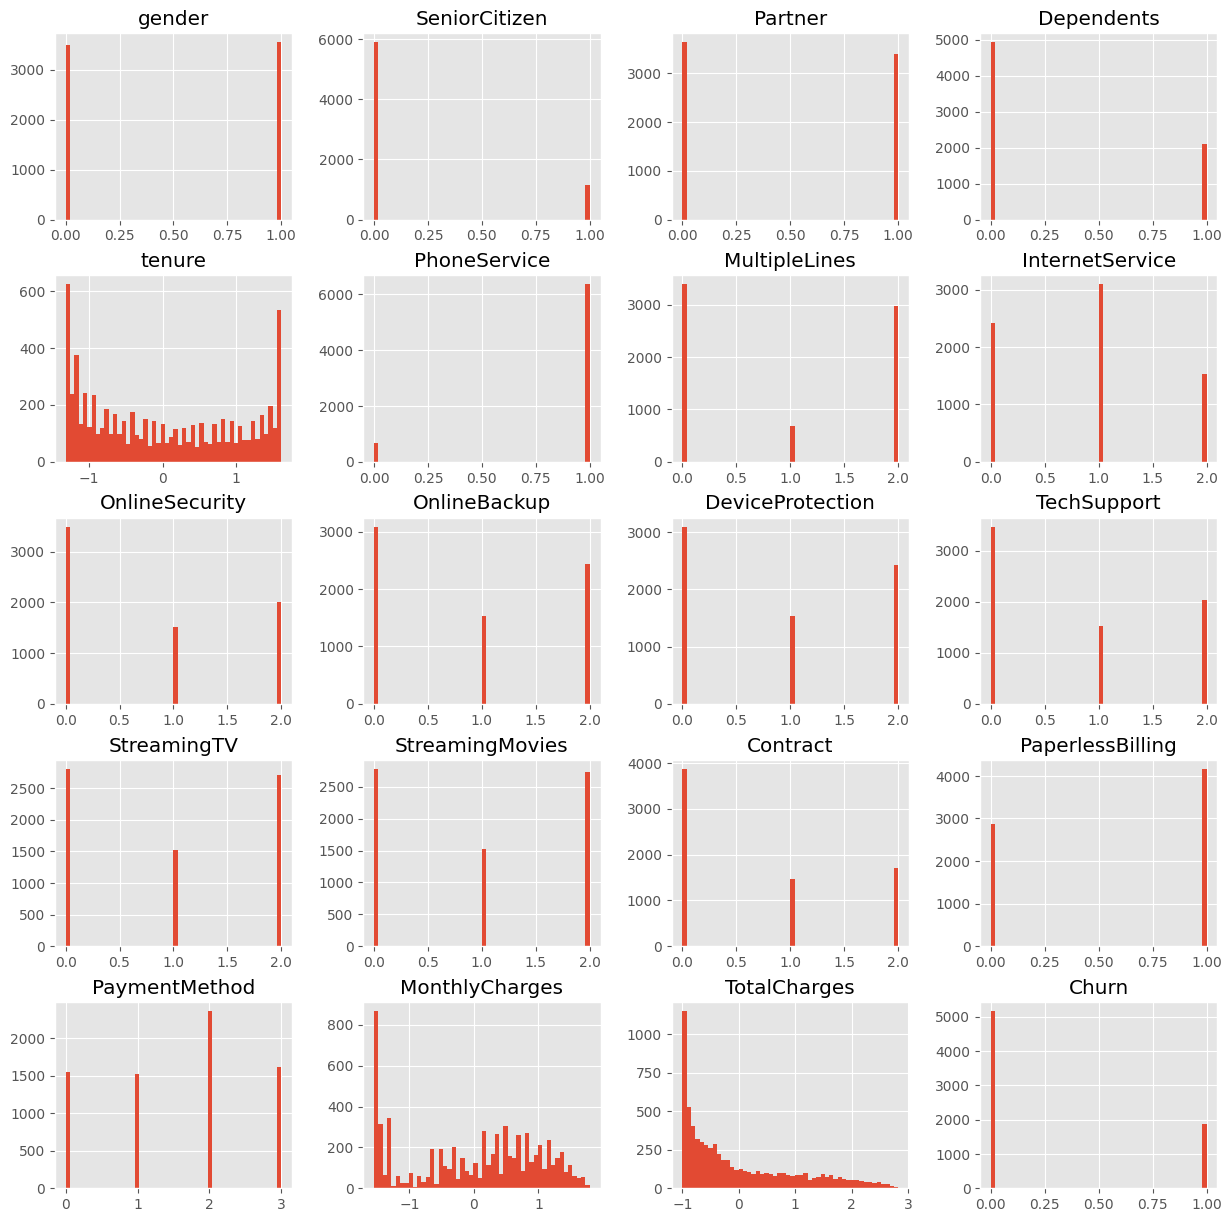

In [26]:
df.hist(bins=50,figsize=(15,15))
plt.show()

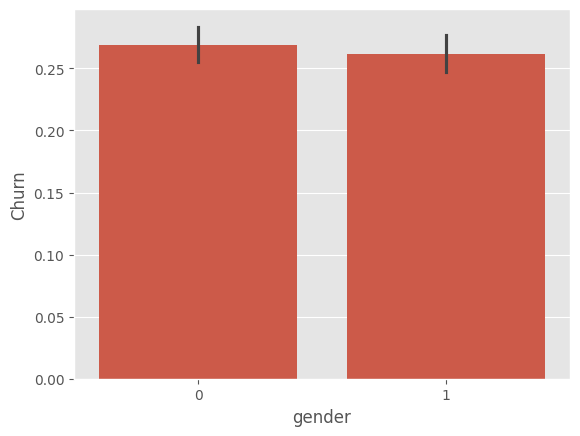

In [27]:
sns.barplot(data=df,x=df['gender'],y=df['Churn'])
plt.show()

<Axes: title={'center': 'Correlation with Churn '}>

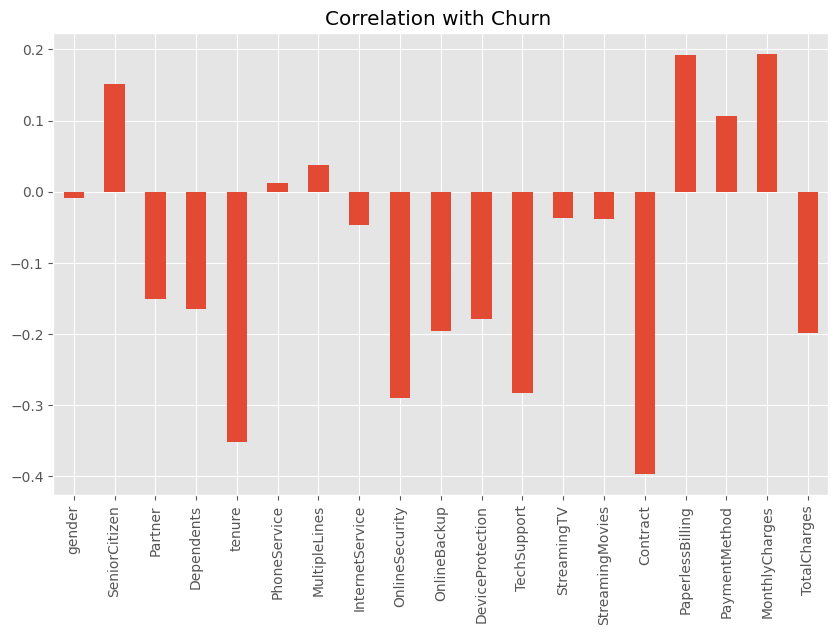

In [28]:
df.drop('Churn',axis=1).corrwith(df.Churn).plot(kind='bar',grid=True,figsize=(10,6),title="Correlation with Churn ")

**Splitting Dataset**

In [29]:
x=df.drop(columns=['Churn'],axis=1)
y=df['Churn']

In [30]:
y.value_counts()# imbalance

,count
Churn,
0,5174
1,1869


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=44)

print(f"the shape of x_train is : {x_train.shape}")
print(f'the shape of x_test is : {x_test.shape}')
print(f'the shape of y_tain is : {y_train.shape}')
print(f'the shape of y_test is {y_test.shape}')

the shape of x_train is : (5282, 19)
the shape of x_test is : (1761, 19)
the shape of y_tain is : (5282,)
the shape of y_test is (1761,)


**Save Data for Model Building**


In [32]:
#save cleaned data to csv
df.to_csv('tel_churn_clean.csv')

Let's continue to Model Building

# Model Building part

Importing Libraries

In [33]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 3.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 87.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 22.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3

In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns

# For Modeling
from pycaret.classification import predict_model
from IPython.display import display, HTML
from sklearn.preprocessing import LabelEncoder
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report
from sklearn.feature_selection import SelectKBest
from xgboost import XGBClassifier
from collections import Counter
from imblearn.combine import SMOTEENN

%matplotlib inline

plt.style.use('default')
import warnings
warnings.filterwarnings("ignore")

Reading data

In [2]:
df = pd.read_csv(r"/content/tel_churn_clean.csv")
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,0,-1.277445,0,1,0,0,...,0,0,0,0,0,1,2,-1.160323,-0.994242,0
1,1,1,0,0,0,0.066327,1,0,0,2,...,2,0,0,0,1,0,3,-0.259629,-0.173244,0
2,2,1,0,0,0,-1.236724,1,0,0,2,...,0,0,0,0,0,1,3,-0.362660,-0.959674,1
3,3,1,0,0,0,0.514251,0,1,0,2,...,2,2,0,0,1,0,0,-0.746535,-0.194766,0
4,4,0,0,0,0,-1.236724,1,0,1,0,...,0,0,0,0,0,1,2,0.197365,-0.940470,1


In [3]:
x = df.drop('Churn',axis=1)
x

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994242
1,1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173244
2,2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959674
3,3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.194766
4,4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,0,1,1,-0.340876,1,2,0,2,0,2,2,2,2,1,1,3,0.665992,-0.128655
7039,7039,0,0,1,1,1.613701,1,2,1,0,2,2,0,2,2,1,1,1,1.277533,2.243151
7040,7040,0,0,1,1,-0.870241,0,1,0,2,0,0,0,0,0,0,1,2,-1.168632,-0.854469
7041,7041,1,1,1,0,-1.155283,1,2,1,0,0,0,0,0,0,0,1,3,0.320338,-0.872062


In [4]:
y = df['Churn']
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [5]:
#its imbalance dataset
y.value_counts()

,count
Churn,
0,5174
1,1869


## Train - Test Split

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [7]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((5634, 20), (5634,), (1409, 20), (1409,))

In [8]:
#its imbalance dataset
y.value_counts()

,count
Churn,
0,5174
1,1869


In [9]:
def evaluate_model_performance(model,test_data):
    prediction=model.predict(test_data)
    #print("Training Accurary : ",model.score(x_train,y_train))
    print("Validation Accurary : {:.2f} %".format(accuracy_score(y_test,prediction)))
    print("Precision Score : {:.2f} %".format(precision_score(y_test,prediction)))
    print("Recall Score : {:.2f} %".format(recall_score(y_test,prediction)))
    print("F1 Score : {:.2f} %".format(f1_score(y_test,prediction)))
    print(classification_report(y_test,prediction))

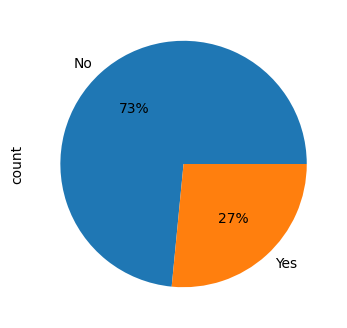

In [10]:
plt.figure(figsize=(8,4))
y.value_counts().plot(kind="pie",autopct="%1.f%%",labels=['No','Yes'])
plt.show()

we have 2 classes class 0 and class 1.
class 0 - majority class
class 1 -minority class

Since the data is unbalanced we can use **SMOTE (Synthetic Minority Over-sampling Technique)** technique

In [11]:
# Print the class distribution before applying SMOTE-ENN
print("Before SMOTE-ENN:", Counter(y))

# Apply SMOTE-ENN
smote = SMOTEENN(random_state=42)
x_st, y_st = smote.fit_resample(x, y)

# Print the class distribution after applying SMOTE-ENN
print("After SMOTE-ENN:", Counter(y_st))


Before SMOTE-ENN: Counter({0: 5174, 1: 1869})
After SMOTE-ENN: Counter({1: 3593, 0: 1385})


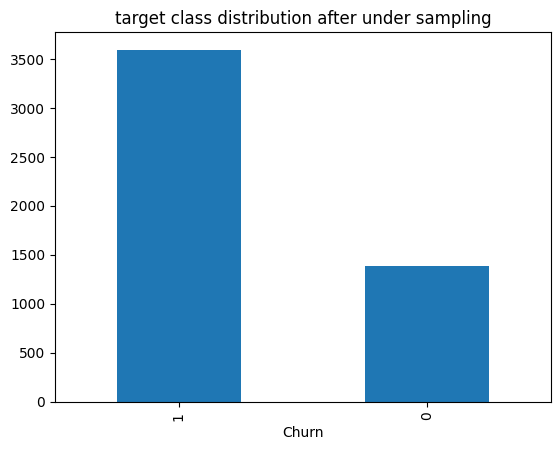

In [12]:
y_st.value_counts().plot(kind="bar")
plt.title("target class distribution after under sampling")
plt.show()

In [13]:
y_st.value_counts()

,count
Churn,
1,3593
0,1385


since we have performed SMOTEENN (combination of Smote + ENN) sampling method and we can see our dataset is nearly balanced

ENN is Edited Nearest Neighbors, technique used to clean up the dataset after oversampling methods like SMOTE. i.e. removes noisy instances

In [14]:
#now split training and validation set using balanced dataset
x_train,x_test,y_train,y_test=train_test_split(x_st,y_st,test_size=0.2,random_state=42)

In [15]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3982, 20), (3982,), (996, 20), (996,))

Building Model with Balanced Dataset and performance hyper parameter tuning using RandomSearchCV

# Model Training

## 1. Random Forest Classifier

In [16]:
param_grid={'n_estimators':[40,80,120,160,200],
            'max_depth':[2,4,6,8,10],
            "criterion":['gini'],
            "random_state":[27,42,43]
            }
random_search_cv=RandomizedSearchCV( estimator=RandomForestClassifier(), param_distributions=param_grid,n_iter=12,cv=5,scoring='f1',verbose=1)
random_search_cv.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=12,
                   param_distributions={'criterion': ['gini'],
                                        'max_depth': [2, 4, 6, 8, 10],
                                        'n_estimators': [40, 80, 120, 160, 200],
                                        'random_state': [27, 42, 43]},
                   scoring='f1', verbose=1)

In [17]:
random_search_cv.best_params_
print('Best Parameters:', random_search_cv.best_params_)

Best Parameters: {'random_state': 43, 'n_estimators': 120, 'max_depth': 10, 'criterion': 'gini'}


In [18]:
#Get final model with best param from RandomizedSearchCV
rf_final_model=random_search_cv.best_estimator_

In [19]:
#evaluate Random Forest Classifier
evaluate_model_performance(rf_final_model,x_test)

Validation Accurary : 0.91 %
Precision Score : 0.92 %
Recall Score : 0.96 %
F1 Score : 0.94 %
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       289
           1       0.92      0.96      0.94       707

    accuracy                           0.91       996
   macro avg       0.90      0.87      0.89       996
weighted avg       0.91      0.91      0.91       996



# 2. XGBoost Classifier

In [20]:
# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [2, 4, 6, 8],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1.0],
    'reg_lambda': [0, 0.1, 0.5, 1.0],
    'objective': ['binary:logistic']
}

# Create RandomizedSearchCV for XGBoost
RandomizedSearch_xg_cv = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_distributions=param_grid,
    cv=5,
    scoring='accuracy',
    random_state=42
)

# Fit RandomizedSearchCV
RandomizedSearch_xg_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           random_state=42, ...),
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'max_depth': [2, 4, 6, 8],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300],
                                        'objective': ['binary:logistic'],
                                        'reg_alpha': [0, 0.1, 0.5, 1.0],
                                        'reg_lambda': [0, 0.1, 0.5, 1.0],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy')

In [21]:
RandomizedSearch_xg_cv.best_params_
print('Best Parameters:', RandomizedSearch_xg_cv.best_params_)

Best Parameters: {'subsample': 0.7, 'reg_lambda': 0.1, 'reg_alpha': 0, 'objective': 'binary:logistic', 'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.7}


In [22]:
xg_smote_model=RandomizedSearch_xg_cv.best_estimator_

In [23]:
#evaluate Random Forest Classifier
evaluate_model_performance(xg_smote_model,x_test)

Validation Accurary : 0.92 %
Precision Score : 0.92 %
Recall Score : 0.96 %
F1 Score : 0.94 %
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       289
           1       0.92      0.96      0.94       707

    accuracy                           0.92       996
   macro avg       0.91      0.88      0.90       996
weighted avg       0.92      0.92      0.92       996



# 3. Gradient Boosting Classifier

In [24]:
param_grid = {
    'n_estimators':[100, 150, 200, 250, 300],
    'criterion': ['friedman_mse', 'squared_error', 'mse', 'mae'],
    'max_depth': [2, 4, 6, 8],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'loss': ['deviance', 'exponential']
}

RandomizedSearch_cv = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_grid,  # Use param_distributions instead of param_grid
    cv=5,
    scoring='accuracy',
    random_state=42
)

RandomizedSearch_cv.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error', 'mse',
                                                      'mae'],
                                        'learning_rate': [0.001, 0.01, 0.1,
                                                          0.2],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [2, 4, 6, 8],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300]},
                   random_state=42, scoring='accuracy')

In [25]:
RandomizedSearch_cv.best_params_
print('Best Parameters:', RandomizedSearch_cv.best_params_)

Best Parameters: {'n_estimators': 100, 'max_depth': 4, 'loss': 'exponential', 'learning_rate': 0.1, 'criterion': 'squared_error'}


In [26]:
gb_smote_model=RandomizedSearch_cv.best_estimator_

In [27]:
#evaluate Random Forest Classifier
evaluate_model_performance(gb_smote_model,x_test)

Validation Accurary : 0.91 %
Precision Score : 0.92 %
Recall Score : 0.96 %
F1 Score : 0.94 %
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       289
           1       0.92      0.96      0.94       707

    accuracy                           0.91       996
   macro avg       0.91      0.88      0.89       996
weighted avg       0.91      0.91      0.91       996



In [28]:
#gb_smote_model = GradientBoostingClassifier(n_estimators=250, max_depth=8, loss='exponential', learning_rate=0.2, criterion='friedman_mse')

Save the Model

In [29]:
from sklearn.ensemble import GradientBoostingClassifier
import joblib

joblib.dump(gb_smote_model, 'Bi_gradient_boosting_model.joblib')
loaded_model = joblib.load('Bi_gradient_boosting_model.joblib')

# Data Analysis for Power BI

In [31]:
#Load final model
from sklearn.ensemble import GradientBoostingClassifier
import joblib
loaded_model = joblib.load('Bi_gradient_boosting_model.joblib')

In [32]:
#original data
import pandas as pd

df1 = pd.read_csv(r"/content/Telco-Customer-Churn.csv")
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
import pandas as pd
#load data that used for model prediction
df2 = pd.read_csv('tel_churn_clean.csv')

df2.drop('Churn',axis=1,inplace=True)
df2.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994242
1,1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173244
2,2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959674
3,3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.194766
4,4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940470


In [34]:
df2

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.994242
1,1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.173244
2,2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-0.959674
3,3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.194766
4,4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-0.940470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,1,0,1,1,-0.340876,1,2,0,2,0,2,2,2,2,1,1,3,0.665992,-0.128655
7039,7039,0,0,1,1,1.613701,1,2,1,0,2,2,0,2,2,1,1,1,1.277533,2.243151
7040,7040,0,0,1,1,-0.870241,0,1,0,2,0,0,0,0,0,0,1,2,-1.168632,-0.854469
7041,7041,1,1,1,0,-1.155283,1,2,1,0,0,0,0,0,0,0,1,3,0.320338,-0.872062


# Prediction Score for analysis

In [35]:
#By using our predicton model Gradient Boosting

prediction = loaded_model.predict_proba(df2)

In [36]:
prediction

array([[0.06536797, 0.93463203],
       [0.94022573, 0.05977427],
       [0.13054385, 0.86945615],
       ...,
       [0.54564512, 0.45435488],
       [0.05846388, 0.94153612],
       [0.90773993, 0.09226007]])

In [37]:
len(prediction)

7043

In [38]:
Prob_Score_for_1 = prediction
Prob_Score_for_0 = prediction

In [39]:
df = pd.DataFrame({'Prob Score for 1': [item[1] for item in prediction],
                   'Prob Score for 0': [item[0] for item in prediction]})

In [40]:
pd.options.display.float_format = '{:.8f}'.format

In [41]:
df

,Prob Score for 1,Prob Score for 0
0,0.93463203,0.06536797
1,0.05977427,0.94022573
2,0.86945615,0.13054385
3,0.01427895,0.98572105
4,0.98758425,0.01241575
...,...,...
7038,0.18201465,0.81798535
7039,0.09106558,0.90893442
7040,0.45435488,0.54564512
7041,0.94153612,0.05846388


In [42]:
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85000000,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95000000,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85000000,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30000000,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70000000,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80000000,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20000000,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60000000,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40000000,306.6,Yes


In [43]:
final = pd.concat([df1,df],axis=1)
final

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Prob Score for 1,Prob Score for 0
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85000000,29.85,No,0.93463203,0.06536797
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95000000,1889.5,No,0.05977427,0.94022573
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85000000,108.15,Yes,0.86945615,0.13054385
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30000000,1840.75,No,0.01427895,0.98572105
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70000000,151.65,Yes,0.98758425,0.01241575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80000000,1990.5,No,0.18201465,0.81798535
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20000000,7362.9,No,0.09106558,0.90893442
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60000000,346.45,No,0.45435488,0.54564512
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40000000,306.6,Yes,0.94153612,0.05846388


### Save file for Power BI analysis

In [45]:
final.to_csv(r'/content/Customer-Churn_Analysis(for PowerBI).csv')